In [1]:



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


RAW_DATA_PATH = Path("../data/raw/QVI_data.csv")
VIS_SAVE_PATH = Path("../visualizations/task2/")
VIS_SAVE_PATH.mkdir(parents=True, exist_ok=True)


df = pd.read_csv(RAW_DATA_PATH)
print(f"Data loaded with shape: {df.shape}")
df.head()


Data loaded with shape: (264834, 12)


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [2]:

df.info()

# Check for nulls
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nUnique store numbers:", df['STORE_NBR'].nunique())
print("Date range:", df['DATE'].min(), "to", df['DATE'].max())


df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month for aggregation
df['MONTH'] = df['DATE'].dt.to_period('M')
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB

Missing values per column:
LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME       

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


In [3]:
# Grouping by Store and Month to calculate metrics
monthly_metrics = df.groupby(['STORE_NBR', 'MONTH']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', pd.Series.nunique),
    transactions=('TXN_ID', pd.Series.nunique)
).reset_index()

# Calculate average transactions per customer
monthly_metrics['avg_txn_per_cust'] = monthly_metrics['transactions'] / monthly_metrics['total_customers']

monthly_metrics.head()


,STORE_NBR,MONTH,total_sales,total_customers,transactions,avg_txn_per_cust
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739


In [5]:
monthly_metrics.dtypes


STORE_NBR               int64
MONTH               period[M]
total_sales           float64
total_customers         int64
transactions            int64
avg_txn_per_cust      float64
dtype: object

In [6]:
monthly_metrics['MONTH'] = monthly_metrics['MONTH'].dt.to_timestamp()


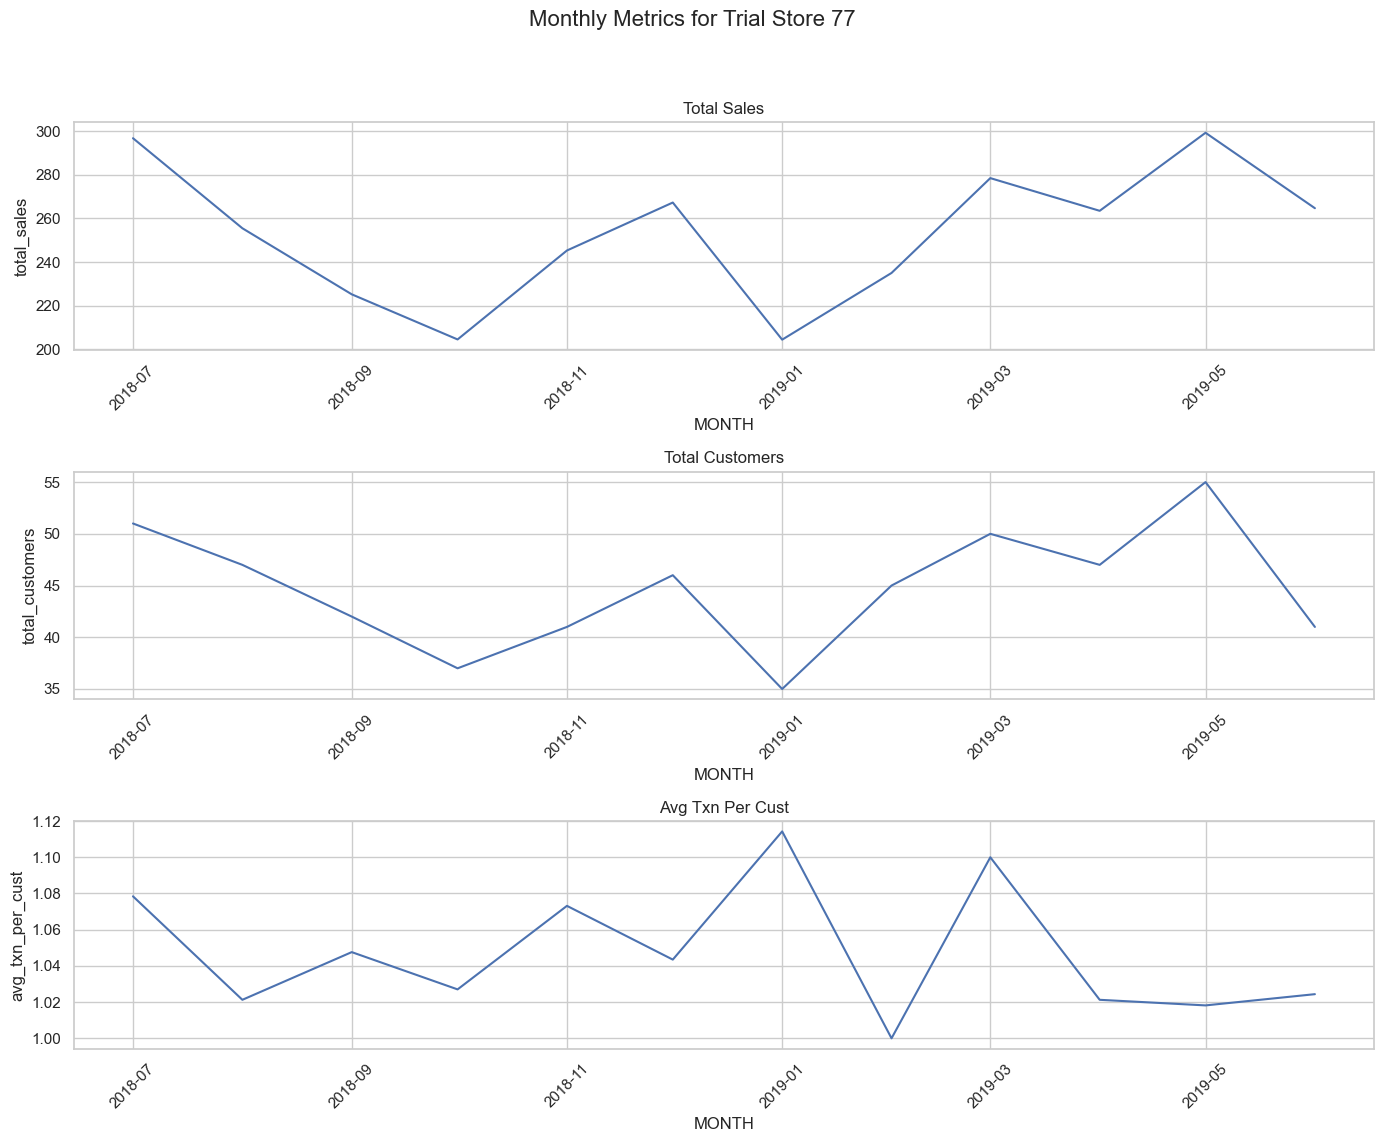

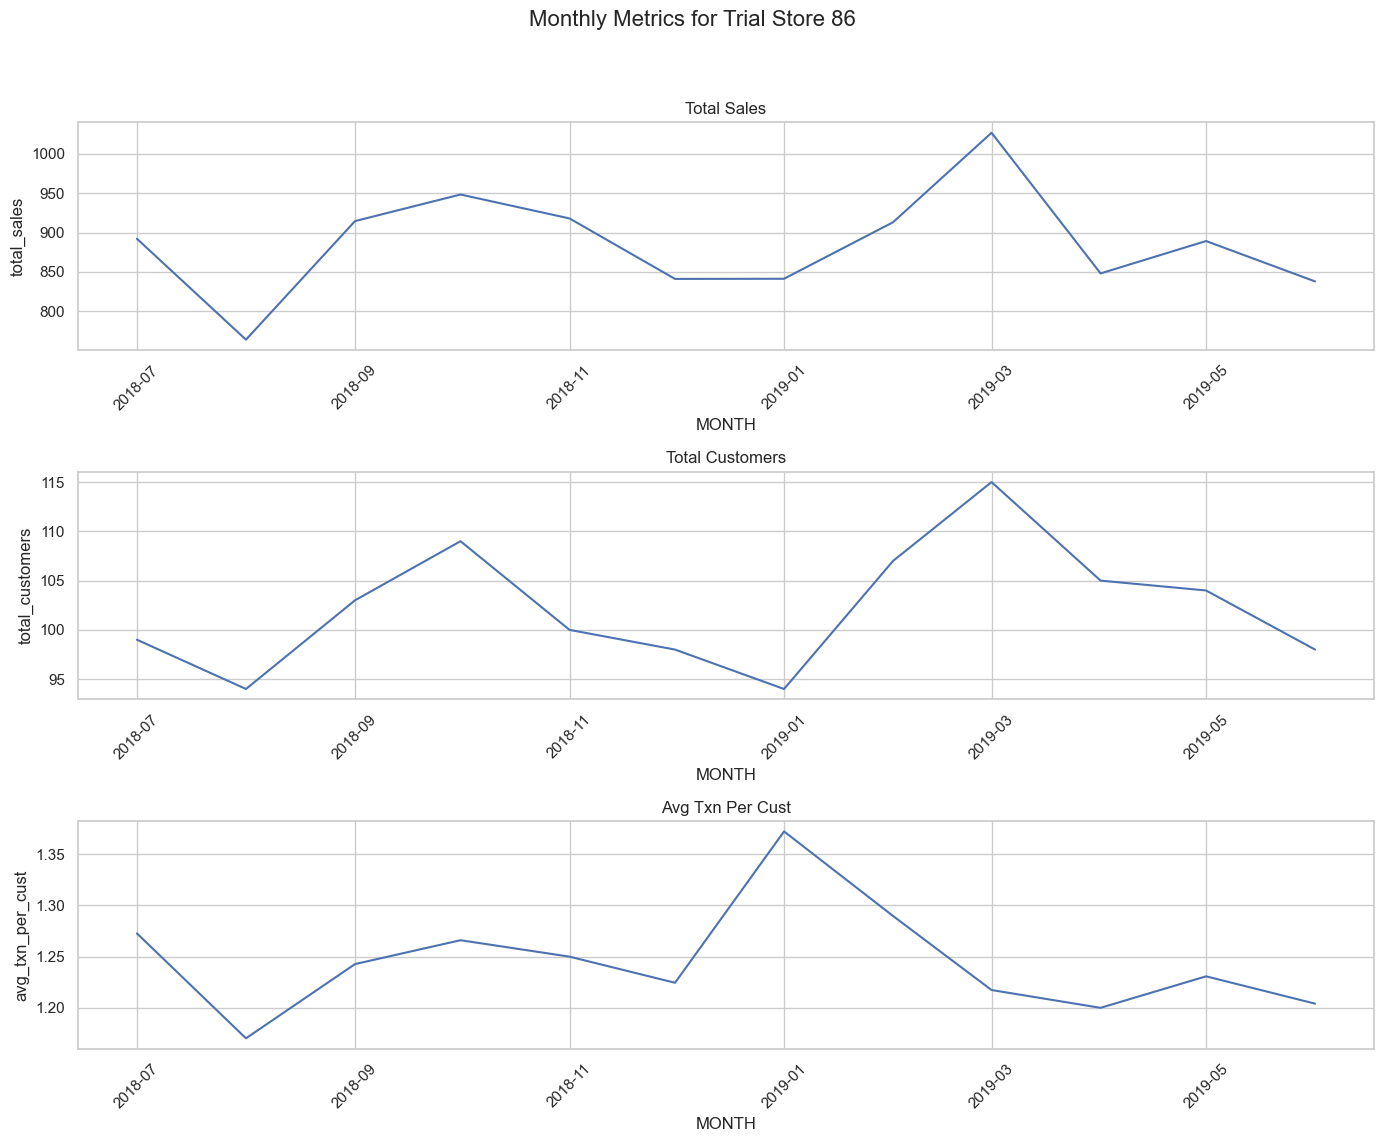

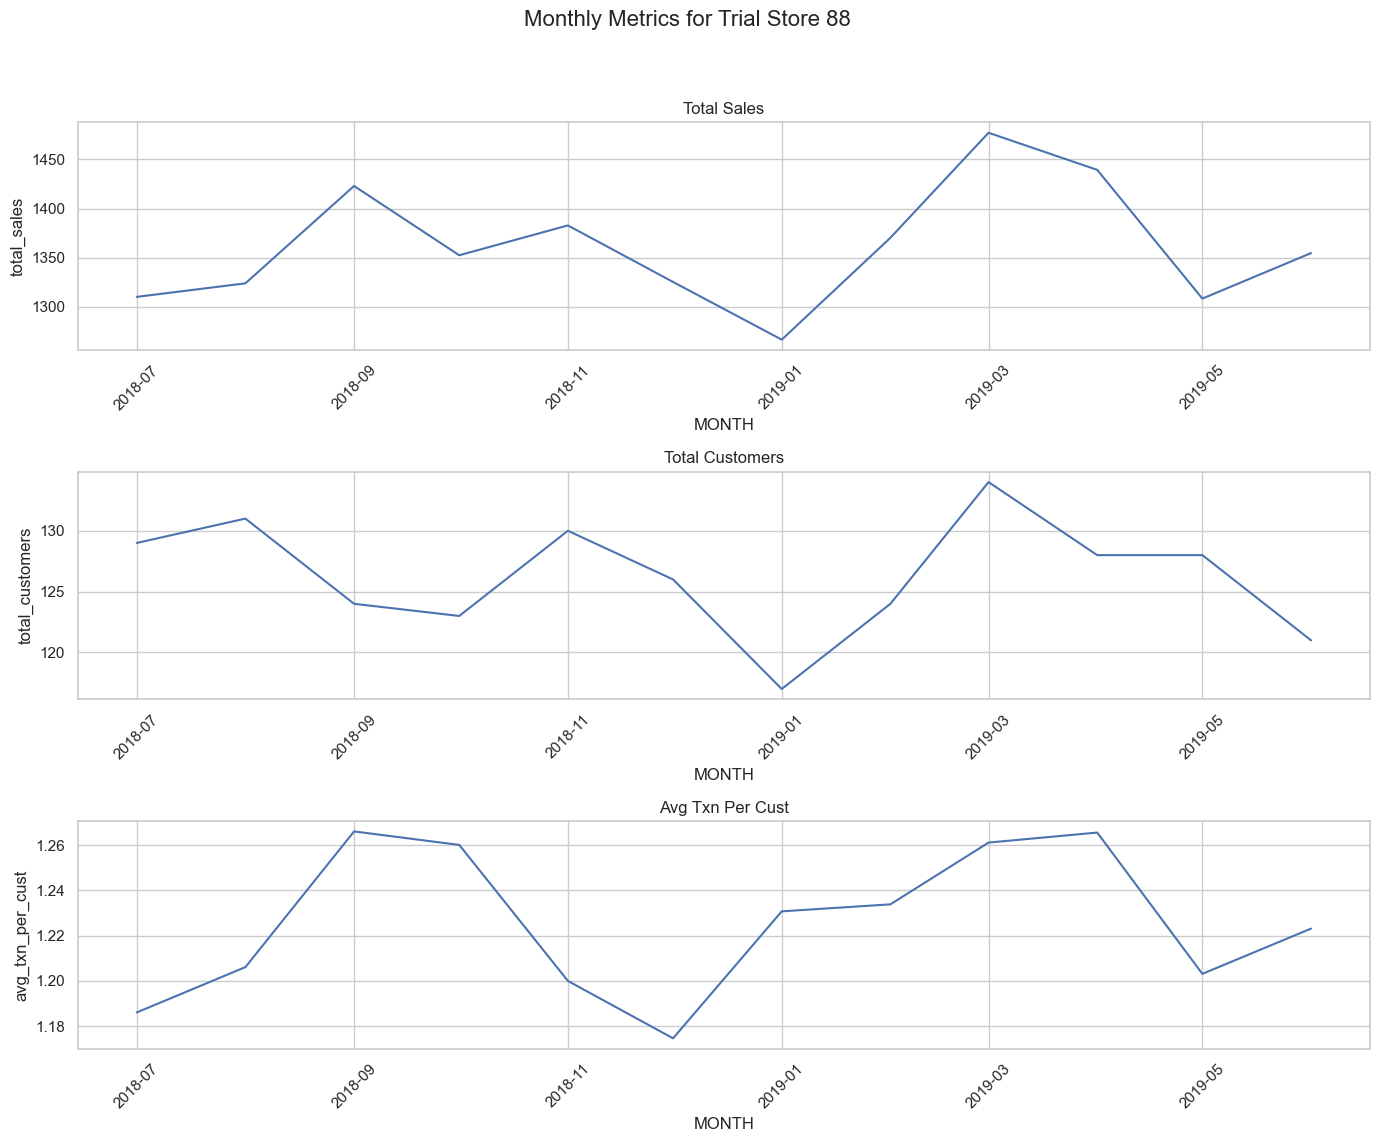

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

trial_stores = [77, 86, 88]
metrics = ['total_sales', 'total_customers', 'avg_txn_per_cust']

sns.set(style="whitegrid")

for store in trial_stores:
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 12))
    fig.suptitle(f"Monthly Metrics for Trial Store {store}", fontsize=16)
    
    for i, metric in enumerate(metrics):
        store_data = monthly_metrics[monthly_metrics['STORE_NBR'] == store]
        sns.lineplot(x='MONTH', y=metric, data=store_data, ax=axes[i])
        axes[i].set_title(metric.replace('_', ' ').title())
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [8]:
# Filter pre-trial data: July 2018 to January 2019
pre_trial_period = monthly_metrics[(monthly_metrics['MONTH'] >= '2018-07') & 
                                   (monthly_metrics['MONTH'] < '2019-02')]


In [9]:
def calculate_similarity(pre_trial_data, trial_store, metrics):
    # Get data for trial store
    trial_data = pre_trial_data[pre_trial_data['STORE_NBR'] == trial_store]
    
    # Get all other stores
    control_stores = pre_trial_data['STORE_NBR'].unique()
    control_stores = control_stores[control_stores != trial_store]
    
    similarity_scores = []

    for store in control_stores:
        store_data = pre_trial_data[pre_trial_data['STORE_NBR'] == store]

        score_components = []
        
        for metric in metrics:
            # Merge on month
            merged = pd.merge(
                trial_data[['MONTH', metric]],
                store_data[['MONTH', metric]],
                on='MONTH',
                suffixes=('_trial', '_control')
            )
            
            # Calculate Euclidean distance
            distance = np.linalg.norm(merged[f'{metric}_trial'] - merged[f'{metric}_control'])
            score_components.append(distance)
        
        # Combine scores (lower is more similar)
        total_score = np.mean(score_components)
        similarity_scores.append((store, total_score))

    # Sort by similarity (ascending distance)
    similarity_df = pd.DataFrame(similarity_scores, columns=['STORE_NBR', 'similarity_score'])
    return similarity_df.sort_values(by='similarity_score')


In [10]:
metrics = ['total_sales', 'total_customers', 'avg_txn_per_cust']


In [13]:
# Ensure MONTH column is period dtype
monthly_metrics['MONTH'] = monthly_metrics['MONTH'].astype('period[M]')

# Define pre-trial period range (as period[M])
pre_trial_months = pd.period_range(start='2018-07', end='2019-01', freq='M')

# Filter data using period comparison
pre_trial_data = monthly_metrics[monthly_metrics['MONTH'].isin(pre_trial_months)]


In [14]:
# Re-run similarity check
control_store_results = {}

for trial_store in [77, 86, 88]:
    print(f"\nTop matches for Trial Store {trial_store}:")
    similar_stores = calculate_similarity(pre_trial_data, trial_store, metrics)
    control_store_results[trial_store] = similar_stores.head()
    print(similar_stores.head())



Top matches for Trial Store 77:
     STORE_NBR  similarity_score
230        233         20.195370
52          53         37.202757
45          46         38.209071
252        255         41.257489
185        188         41.400537

Top matches for Trial Store 86:
     STORE_NBR  similarity_score
106        109         38.990722
152        155         39.778746
222        225         45.483132
219        222         49.069016
226        229         59.660917

Top matches for Trial Store 88:
     STORE_NBR  similarity_score
234        237         66.212870
200        203         78.589187
162        165        116.294628
39          40        118.033949
196        199        142.282358


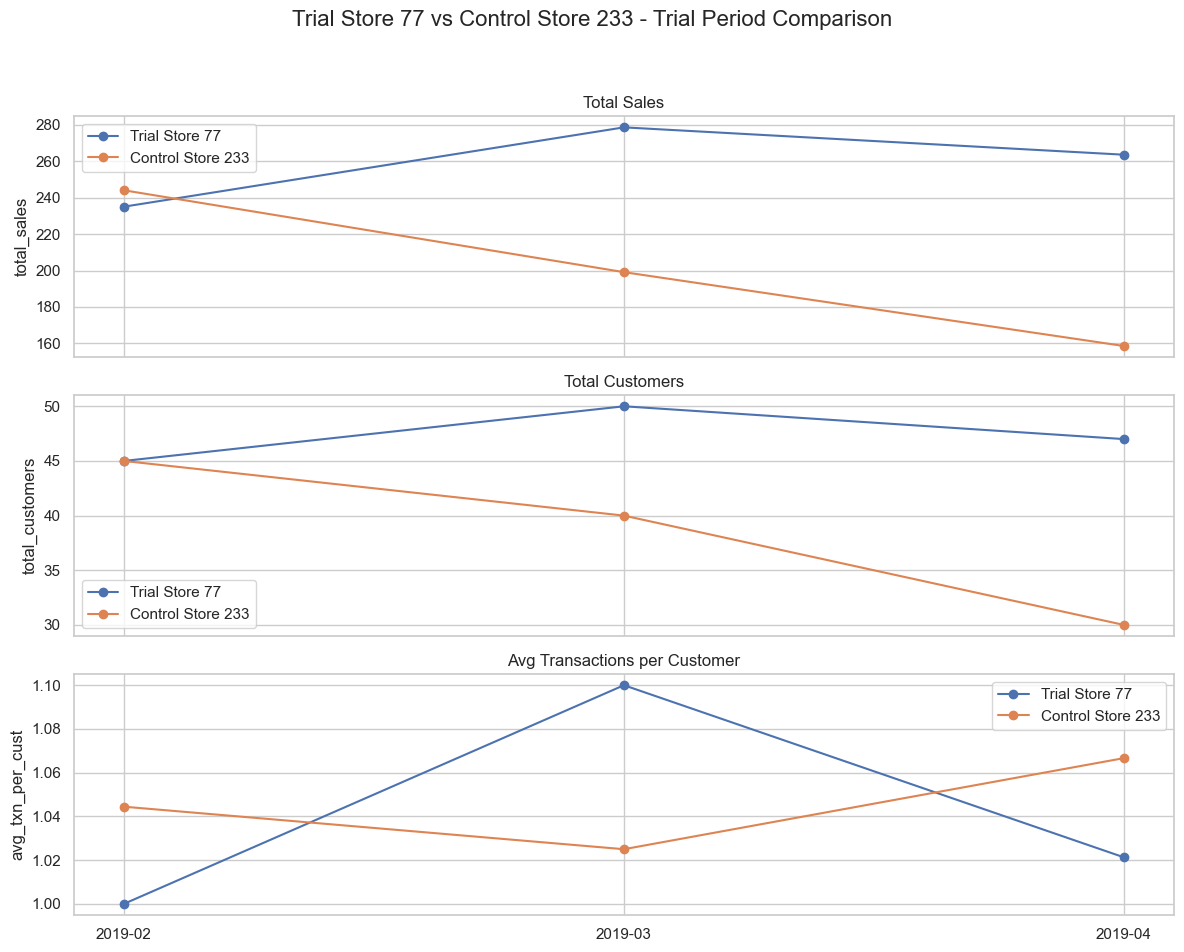

In [15]:
import matplotlib.pyplot as plt


trial_months = pd.period_range(start='2019-02', end='2019-04', freq='M')

store_77 = monthly_metrics[(monthly_metrics['STORE_NBR'] == 77) & (monthly_metrics['MONTH'].isin(trial_months))]
store_233 = monthly_metrics[(monthly_metrics['STORE_NBR'] == 233) & (monthly_metrics['MONTH'].isin(trial_months))]

fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
metrics = ['total_sales', 'total_customers', 'avg_txn_per_cust']
titles = ['Total Sales', 'Total Customers', 'Avg Transactions per Customer']

for i, metric in enumerate(metrics):
    axes[i].plot(store_77['MONTH'].astype(str), store_77[metric], marker='o', label='Trial Store 77')
    axes[i].plot(store_233['MONTH'].astype(str), store_233[metric], marker='o', label='Control Store 233')
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(metric)
    axes[i].legend()
    axes[i].grid(True)

plt.suptitle('Trial Store 77 vs Control Store 233 - Trial Period Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [17]:
def plot_trial_vs_control(metrics_df, trial_store, control_store):
    import matplotlib.pyplot as plt
    import seaborn as sns

    metrics = ['total_sales', 'total_customers', 'avg_txn_per_cust']
    labels = ['Total Sales ($)', 'Total Customers', 'Avg Transactions per Customer']

    fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
    fig.suptitle(f"Store {trial_store} vs Control Store {control_store}", fontsize=16)

    for i, metric in enumerate(metrics):
        trial_data = metrics_df[metrics_df['STORE_NBR'] == trial_store]
        control_data = metrics_df[metrics_df['STORE_NBR'] == control_store]

        sns.lineplot(x='MONTH', y=metric, data=control_data, ax=axes[i], label=f'Store {control_store}')
        sns.lineplot(x='MONTH', y=metric, data=trial_data, ax=axes[i], label=f'Store {trial_store}')

        axes[i].set_ylabel(labels[i])
        axes[i].set_xlabel('Month')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [19]:
def plot_trial_vs_control(metrics_df, trial_store, control_store):
    import matplotlib.pyplot as plt
    import seaborn as sns

    metrics = ['total_sales', 'total_customers', 'avg_txn_per_cust']
    labels = ['Total Sales ($)', 'Total Customers', 'Avg Transactions per Customer']

    # Ensure MONTH is in datetime format
    metrics_df = metrics_df.copy()
    metrics_df['MONTH'] = metrics_df['MONTH'].dt.to_timestamp()

    fig, axes = plt.subplots(3, 1, figsize=(14, 15), sharex=True)
    fig.suptitle(f"Store {trial_store} vs Control Store {control_store}", fontsize=16)

    for i, metric in enumerate(metrics):
        trial_data = metrics_df[metrics_df['STORE_NBR'] == trial_store]
        control_data = metrics_df[metrics_df['STORE_NBR'] == control_store]

        sns.lineplot(x='MONTH', y=metric, data=control_data, ax=axes[i], label=f'Store {control_store}')
        sns.lineplot(x='MONTH', y=metric, data=trial_data, ax=axes[i], label=f'Store {trial_store}')

        axes[i].set_ylabel(labels[i])
        axes[i].set_xlabel('Month')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


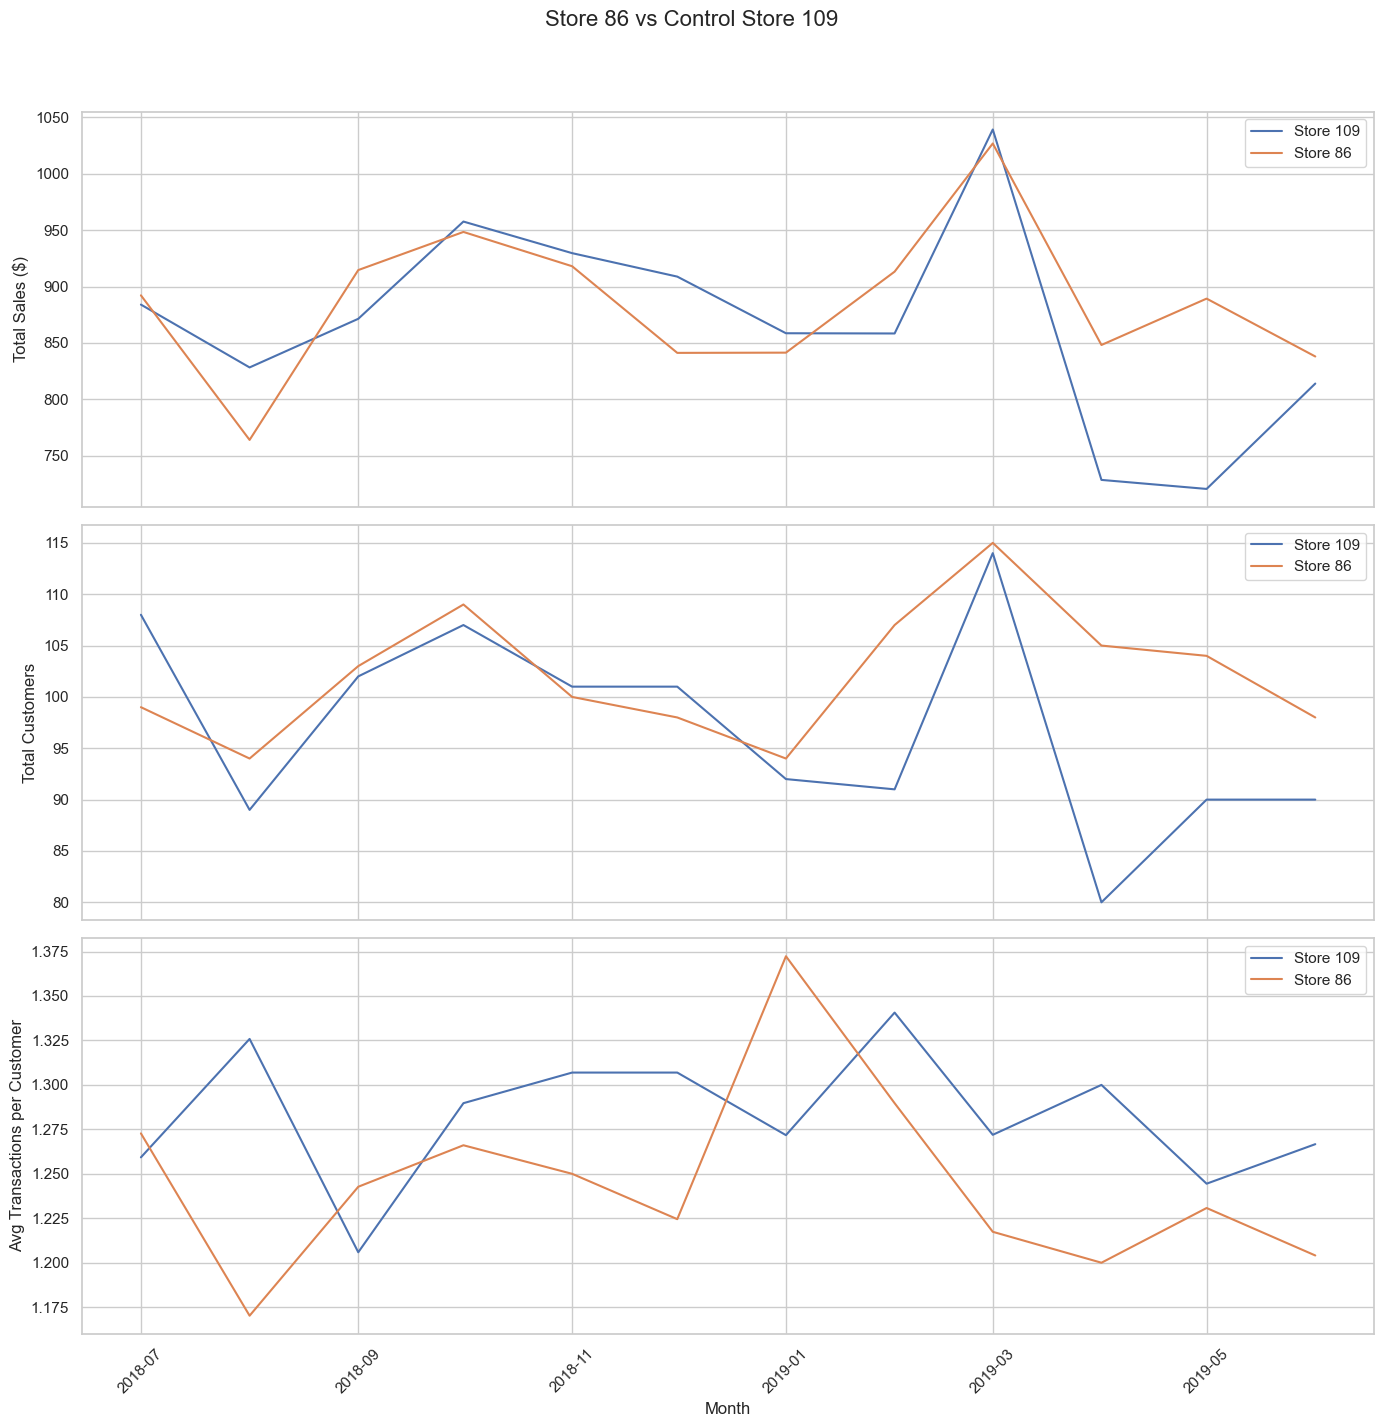

In [20]:
plot_trial_vs_control(monthly_metrics, 86, 109)


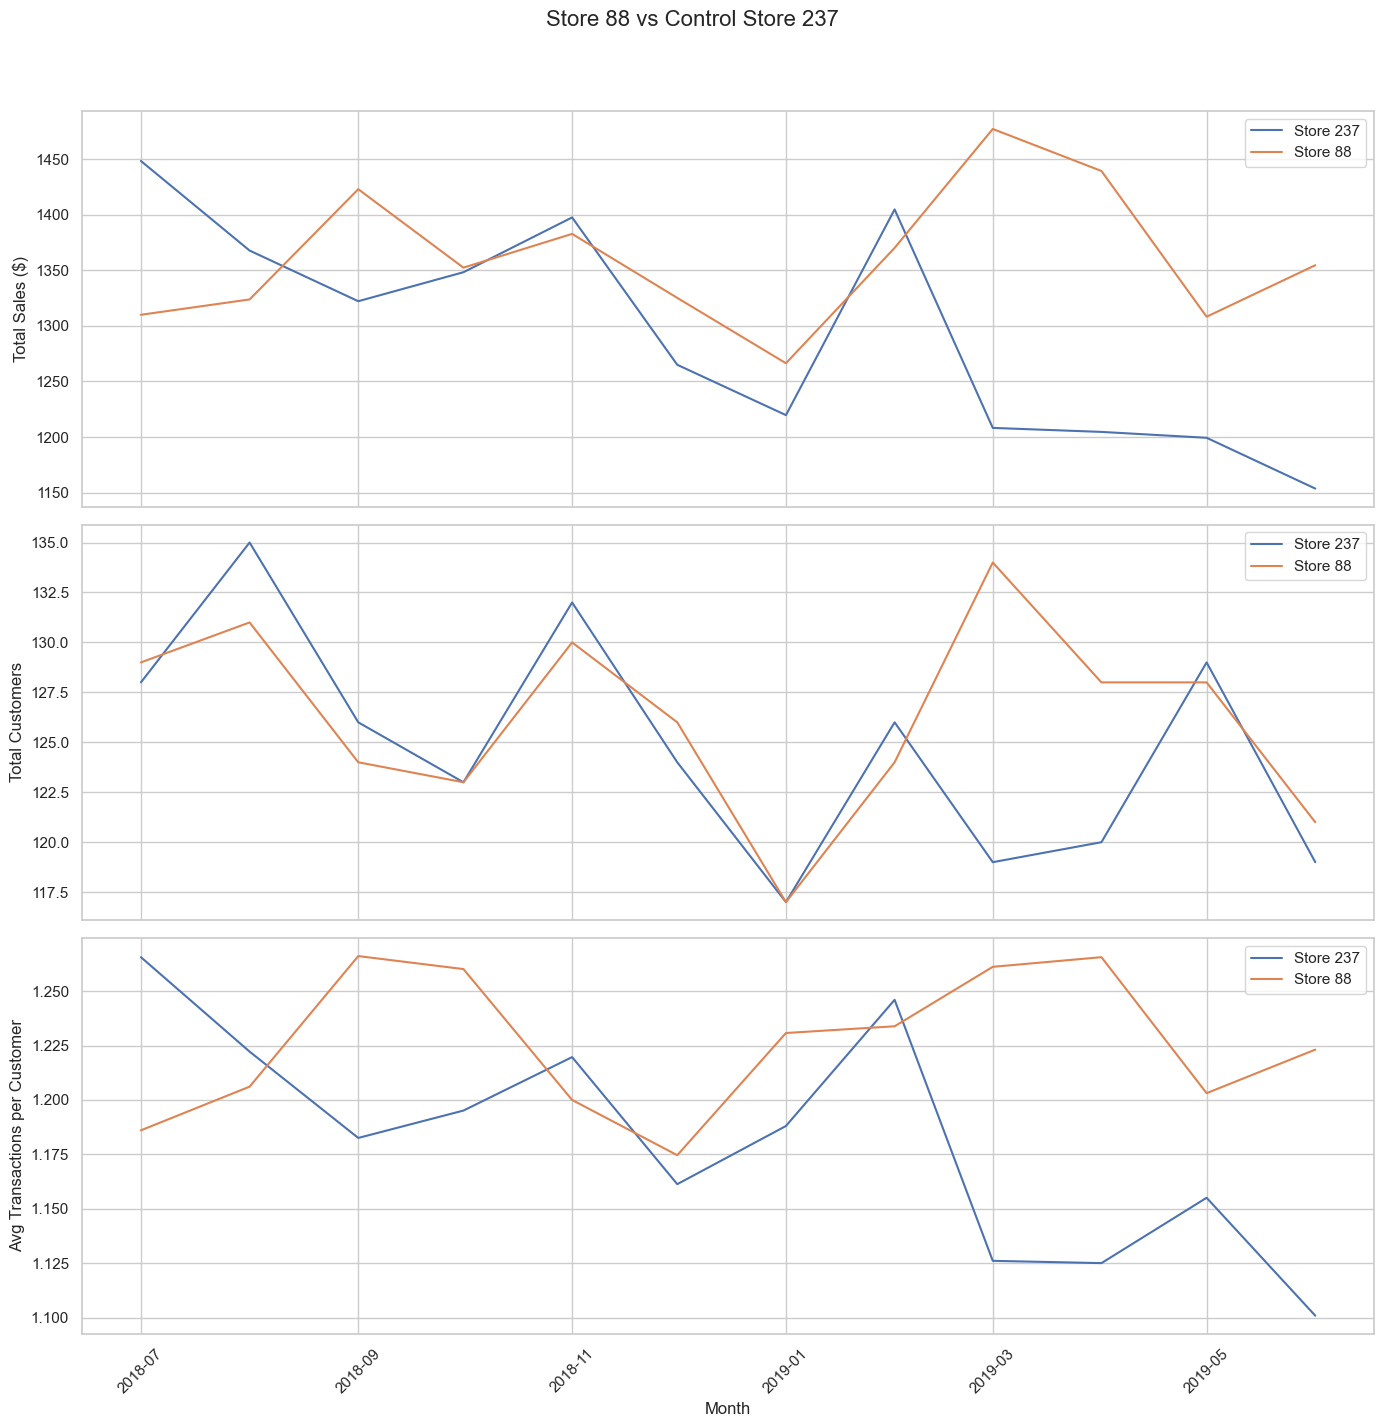

In [21]:
plot_trial_vs_control(monthly_metrics, 88, 237)


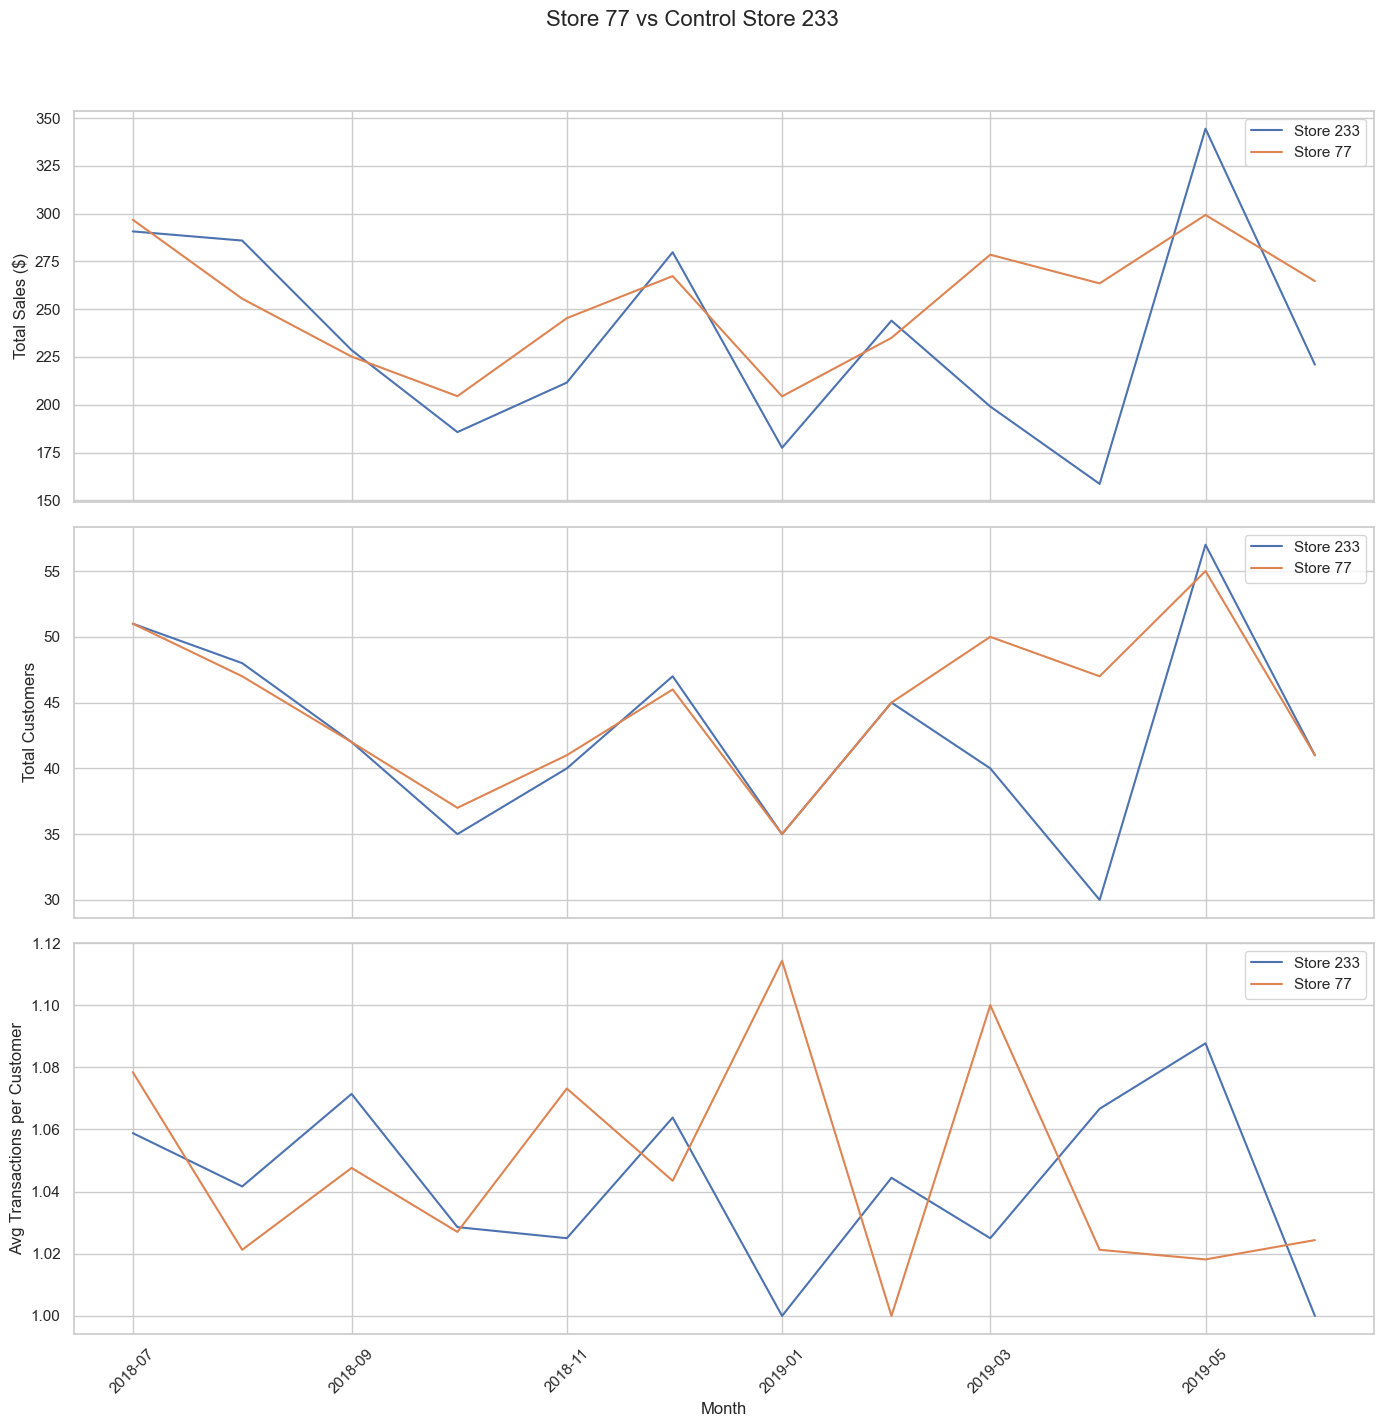

In [22]:
plot_trial_vs_control(monthly_metrics, 77, 233)


In [23]:
def calculate_percentage_change(pre_trial, trial):
    return (trial - pre_trial) / pre_trial

def assess_statistical_significance(control_pre, control_trial, trial_pre, trial_trial):
    control_change = calculate_percentage_change(control_pre, control_trial)
    trial_change = calculate_percentage_change(trial_pre, trial_trial)
    std_dev = np.std([control_pre, control_trial])
    t_stat = (trial_change - control_change) / (std_dev if std_dev != 0 else 1e-6)
    return t_stat


trial_control_pairs = {77: 233, 86: 109, 88: 237}

# Time periods
pre_trial_months = ['2018-11', '2018-12', '2019-01']
trial_months = ['2019-02', '2019-03', '2019-04']

# Analyzing each pair
for trial_store, control_store in trial_control_pairs.items():
    print(f"\nStore {trial_store} vs Control Store {control_store}")

    for metric in ['total_sales', 'total_customers']:
        
        trial_pre = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == trial_store) & 
            (monthly_metrics['MONTH'].astype(str).isin(pre_trial_months))
        ][metric].mean()

        control_pre = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == control_store) & 
            (monthly_metrics['MONTH'].astype(str).isin(pre_trial_months))
        ][metric].mean()

        trial_post = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == trial_store) & 
            (monthly_metrics['MONTH'].astype(str).isin(trial_months))
        ][metric].mean()

        control_post = monthly_metrics[
            (monthly_metrics['STORE_NBR'] == control_store) & 
            (monthly_metrics['MONTH'].astype(str).isin(trial_months))
        ][metric].mean()

        # Assess impact
        t_score = assess_statistical_significance(control_pre, control_post, trial_pre, trial_post)
        print(f"  {metric}: t-score = {t_score:.2f}")



Store 77 vs Control Store 233
  total_sales: t-score = 0.02
  total_customers: t-score = 0.19

Store 86 vs Control Store 109
  total_sales: t-score = 0.01
  total_customers: t-score = 0.10

Store 88 vs Control Store 237
  total_sales: t-score = 0.01
  total_customers: t-score = 0.04
